In [966]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from shapely.geometry import Point
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.cm as cm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [967]:
master_df = pd.read_csv(r'master_df.csv')
master_df.head()

,Unnamed: 0.1,LA code,Ofsted Avg,lonely_avg,KS2 metrics PCA,GDHI income index,LA flow rate,All Ages,meds,old%,...,FSM Eligible %,<2 A levels,< AAB,perm_excl_rate,Unsuccessful Appeals,% of ppl not doing degrees,progression_rate,total_pop,Unnamed: 0,"Average Rainfall (June, mm)"
0,0,E06000001,3.000000,-0.542761,-22376.054139,NaN,0.006386,7819.666667,40.914654,0.192425,...,25.797120,29.545,89.831,7.240653,75.0,53.4,0.389333,5480.0,74.0,88.6
1,1,E06000002,2.955556,1.316155,-16308.990169,NaN,0.009087,7472.833333,38.022965,0.173324,...,24.189824,36.743,90.881,17.357524,78.3,46.1,0.413947,7890.0,75.0,94.0
2,2,E06000003,2.791667,0.649266,-18159.719122,76.2,0.006610,7222.526316,44.315926,0.227442,...,17.971133,23.263,86.907,26.902558,58.2,23.0,0.374421,7550.0,76.0,89.0
3,3,E06000004,3.085714,0.635474,-11390.336475,79.3,0.006535,8225.791667,41.914379,0.198321,...,16.438313,22.014,81.560,12.734798,71.0,22.7,0.427333,10385.0,77.0,66.6
4,4,E06000005,2.894737,0.967079,-22128.626436,82.8,0.007193,7160.133333,42.795048,0.204487,...,16.558996,23.524,82.458,6.176271,71.2,35.8,0.390533,5635.0,95.0,71.2


In [968]:
complete_df= master_df.drop(columns=['Unnamed: 0.1','LA code','GDHI income index'])
complete_df.dropna(inplace=True)
print(complete_df.dtypes)
X = complete_df.drop(columns=['lonely_avg'])
# X = X[['Ofsted Avg','FSM Eligible %','< AAB','progression_rate','Average Rainfall (June, mm)']]
y = complete_df[['lonely_avg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Ofsted Avg                     float64
lonely_avg                     float64
KS2 metrics PCA                float64
LA flow rate                   float64
All Ages                       float64
meds                           float64
old%                           float64
young%                         float64
3rd Pref %P                    float64
Non Preferred Offer %P         float64
No Offer %P                    float64
Offer in diff LA code %P       float64
3rd Pref %S                    float64
Non Preferred Offer %S         float64
No Offer %S                    float64
Offer in diff LA code %S       float64
FSM Eligible %                 float64
<2 A levels                    float64
< AAB                          float64
perm_excl_rate                 float64
Unsuccessful Appeals           float64
% of ppl not doing degrees     float64
progression_rate               float64
total_pop                      float64
Unnamed: 0                     float64
Average Rainfall (June, m

In [969]:
clf_model = DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
clf_model.score(X_test,y_test)

0.07994465430397524

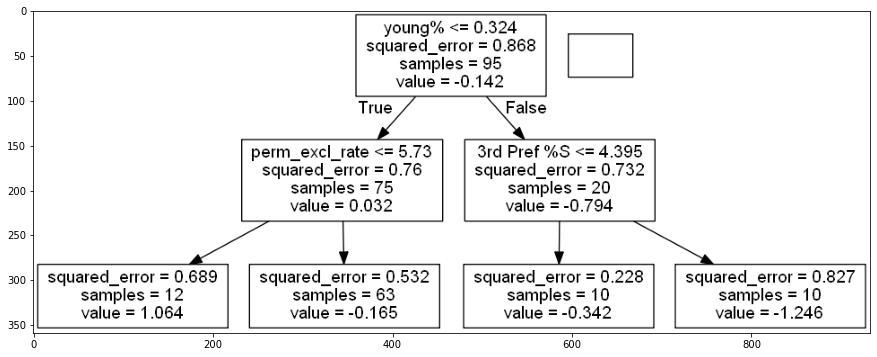

In [970]:
from sklearn import tree
import graphviz
import pydotplus
import matplotlib.image as mpimg
feature_names = list(X.columns)
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,    
                      )  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data).write_png('decision_tree.png')
plt.figure(figsize=(15,15))
img = mpimg.imread('decision_tree.png')
imgplot = plt.imshow(img)

plt.show()